# UK Accidents classification - Part One

## Table of Contents

1. Prediction Objective
2. Setting up Environment
3. Data Pre-Processing
4. Exploratory Data Analysis
5. Data Cleaning and Transformation
6. Exporting Data
7. Conclusion


## 1. Prediction objective

Road accidents remain one of the leading casues of death worldwide and costs the UK economy approximately 28 Billion pounds annually (2020 estimate). The loss of life, injury, as well as significant burden on the economy emphasizes the vital need to prevent and reduce accidents where possible.  

The Department of Transport, UK, estimates that the cost of a Fatal accident itself is significantly higher than that of a Slight, or Severe accident, at 2 Million pounds on average. Owing to this, the authority would like to better understand factors that lead up to Fatal Accidents in order to design and implement effective and focused preventive measures.

We will be looking at summarizing the main features of the data and highlight interesting facts that are currently happening. We'll be identifying and quantify the associations between the accident severity and other variables in the dataset. We'll be exploring the 3 different datasets - Accidents, vehicles and causalities over the last 5 years 2016 - 2020.

## 2. Setting up Environment

In [1]:
# import the required libraries

# base libraries
import os
import time


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Data manipulation
import numpy as np
import pandas as pd

# Data Pre-processing and transformation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from functools import reduce

# do not print warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Global set to view all columns
pd.set_option('display.max_columns', None)

In [3]:
# change working directory
cwd = os.getcwd()
os.chdir(r"M:\Msc Business Analytics\Semester 2\Big Data for Decision Making\Assessment\Datasets\5 Year Datasets")

In [4]:
Start_time = time.time()

## 3. Data Pre-Processing

### 3.1 Data Loading and Preparation

In this section we will load the required datasets into pandas dataframes and filter out any variables we do not require for later analysis or model building

In [5]:
# import datasets onto python and save in dataframe
accidents = pd.read_csv("dft-road-casualty-statistics-accident-last-5-years.csv")
casualty = pd.read_csv("dft-road-casualty-statistics-casualty-last-5-years.csv")
vehicle = pd.read_csv("dft-road-casualty-statistics-vehicle-last-5-years.csv")

# import the dataset guide file that will provide us with labels for Cat variables
guide = pd.read_excel("Road-Safety-Open-Dataset-Data-Guide.xlsx", header=0)
guide = guide.drop('note', axis=1)

In [6]:
# observe the shape of the datasets
print(accidents.shape, casualty.shape, vehicle.shape)

(597973, 36) (781716, 18) (1101591, 27)


As expected, there would be multiple casualties, and vehicles involved in one accident

In [7]:
# inspect the data guide file
guide.head()

,table,field name,code/format,label
0,Accident,police_force,1,Metropolitan Police
1,Accident,police_force,3,Cumbria
2,Accident,police_force,4,Lancashire
3,Accident,police_force,5,Merseyside
4,Accident,police_force,6,Greater Manchester


With our datasets loaded in, we'll now inspect them and remove any redundant variables

In [8]:
# inspect accidents dataset
accidents.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,2,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,2,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,E09000018,3,312,3,40.0,0,-1,-1,-1,0,0,1,1,1,0,0,1,1,2,E01002583


In [9]:
# inspect casualty dataset
casualty.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2016010000005,2016,010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,2016,010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,2016,010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,2016,010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2016,010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


In [10]:
# inspect vehicle dataset
vehicle.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,-1,9,1


In [11]:
# With the necessary variables identified, we'll now proceed to remove any redundant variables

# we assign a list with all the columns we require in each of the 3 datasets below
accidentrequired = ["accident_index", "longitude", "latitude", "accident_severity","date", "day_of_week", "time", 
                    "speed_limit", "weather_conditions", "light_conditions","first_road_class",
                   "road_surface_conditions"]

# next we run a loop over the accidents dataset to only keep columns in the previous list
for column in accidents:
    if column not in accidentrequired:
        del accidents[column]

# Repeat above process for the next two datasets

casualtyrequired = ["accident_index", "casualty_class", "sex_of_casualty", "age_of_casualty", "casualty_type"]

for column in casualty:
    if column not in casualtyrequired:
        del casualty[column]


vehiclerequired = ["accident_index", "vehicle_type", "age_of_driver", 'age_band_of_driver', "sex_of_driver",
                "age_of_vehicle", "driver_home_area_type","engine_capacity_cc","driver_imd_decile"]

for column in vehicle:
    if column not in vehiclerequired:
        del vehicle[column]

### 3.2 Mapping Categorical Variable Labels

In [12]:
# get the label data as a grouped object from the data guide
grouped = guide.groupby(guide['field name'])

In [13]:
# define a function to create individual dictionaries for each categorical variable and value pair
def getfunc(object, column):
    
    # gets the group corresponding to the categorical column and drops non-required columns
    x = object.get_group(column).drop(columns=['table', 'field name'])

    # convert the object to a dictionary with only the code/format and label columns remaining
    x = x.set_index('code/format')['label'].to_dict()

    return x 

# we can use this function for all of our datasets

In [14]:
# we replace columns with the label dictionaries we get from applying the above function to grouped object
accidents['weather_conditions'] = accidents['weather_conditions'].map(getfunc(grouped,'weather_conditions'))
accidents['day_of_week'] = accidents['day_of_week'].map(getfunc(grouped, 'day_of_week'))
accidents['first_road_class'] = accidents['first_road_class'].map(getfunc(grouped, "first_road_class"))
accidents['accident_severity'] = accidents['accident_severity'].map(getfunc(grouped, "accident_severity"))
accidents['light_conditions'] = accidents['light_conditions'].map(getfunc(grouped, "light_conditions"))
accidents['road_surface_conditions'] = accidents['road_surface_conditions'].map(getfunc(grouped, "road_surface_conditions"))

In [15]:
# mapping categorical labels to casualty dataset
casualty['casualty_class'] = casualty['casualty_class'].map(getfunc(grouped, 'casualty_class'))
casualty['sex_of_casualty'] = casualty['sex_of_casualty'].map(getfunc(grouped, 'sex_of_casualty')) 
casualty['casualty_type'] = casualty['casualty_type'].map(getfunc(grouped, 'casualty_type'))

In [16]:
# mapping categorical variables to vehicles dataset
vehicle['vehicle_type'] = vehicle['vehicle_type'].map(getfunc(grouped, 'vehicle_type'))
vehicle['sex_of_driver'] = vehicle['sex_of_driver'].map(getfunc(grouped, 'sex_of_driver'))
vehicle['age_band_of_driver'] = vehicle['age_band_of_driver'].map(getfunc(grouped, 'age_band_of_driver'))
vehicle['driver_imd_decile'] = vehicle['driver_imd_decile'].map(getfunc(grouped, 'driver_imd_decile'))
vehicle['driver_home_area_type'] = vehicle['driver_home_area_type'].map(getfunc(grouped, 'driver_home_area_type'))

With our individual datasets loaded in and labelled, we can inspect it for any additional steps we need to take

In [17]:
accidents.head()

,accident_index,longitude,latitude,accident_severity,date,day_of_week,time,first_road_class,speed_limit,light_conditions,weather_conditions,road_surface_conditions
0,2016010000005,-0.279323,51.584754,Slight,01/11/2016,Tuesday,02:30,A,30.0,Darkness - lights unlit,Fine no high winds,Dry
1,2016010000006,0.184928,51.449595,Slight,01/11/2016,Tuesday,00:37,A,30.0,Darkness - lights lit,Fine no high winds,Dry
2,2016010000008,-0.473837,51.543563,Slight,01/11/2016,Tuesday,01:25,A,30.0,Darkness - lights lit,Fine no high winds,Dry
3,2016010000016,-0.164442,51.404958,Slight,01/11/2016,Tuesday,09:15,A,30.0,Daylight,Fine no high winds,Dry
4,2016010000018,-0.406580,51.483139,Slight,01/11/2016,Tuesday,07:53,A,40.0,Daylight,Fine no high winds,Dry


In [18]:
vehicle.head()

,accident_index,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2016010000005,Taxi/Private hire car,Male,51,46 - 55,-1,-1,More deprived 20-30%,Urban area
1,2016010000005,Motorcycle 50cc and under,Male,23,21 - 25,124,4,More deprived 30-40%,Urban area
2,2016010000006,Car,Female,36,36 - 45,1461,1,Least deprived 10%,Urban area
3,2016010000008,Car,Male,24,21 - 25,1390,5,Less deprived 20-30%,Urban area
4,2016010000016,Bus or coach (17 or more pass seats),Male,55,46 - 55,6692,7,Less deprived 10-20%,Urban area


In [19]:
casualty.head() 

,accident_index,casualty_class,sex_of_casualty,age_of_casualty,casualty_type
0,2016010000005,Driver or rider,Male,23,Motorcycle 50cc and under rider or passenger
1,2016010000006,Driver or rider,Female,36,Car occupant
2,2016010000008,Driver or rider,Male,24,Car occupant
3,2016010000016,Passenger,Female,59,Bus or coach occupant (17 or more pass seats)
4,2016010000018,Driver or rider,Male,28,Cyclist


### 3.3 Merging and Joining our Dataframes

In [20]:
# merging both dataframes
# we merge the dataframes as 'inner' to ensure only accident data observed in all 3 datasets are merged. 
df2 = accidents.merge(vehicle,on='accident_index', how='inner'
    ).merge(casualty,on='accident_index', how='inner')



# inspect the dimensions of our new combined dataset and drop any duplicates
print(df2.shape)
df2.drop_duplicates(keep ='first', inplace = True)
print(df2.shape)

(1229471, 24)
(1217562, 24)


In [21]:
# inspect our combined dataframe
df2.tail()

,accident_index,longitude,latitude,accident_severity,date,day_of_week,time,first_road_class,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_type
1229466,2020991030297,-2.271903,57.186317,Serious,15/04/2020,Wednesday,12:42,B,60.0,Daylight,Fine no high winds,Dry,Car,Male,57,56 - 65,1968,2,Less deprived 30-40%,Urban area,Driver or rider,Male,38,Motorcycle over 500cc rider or passenger
1229467,2020991030297,-2.271903,57.186317,Serious,15/04/2020,Wednesday,12:42,B,60.0,Daylight,Fine no high winds,Dry,Motorcycle over 500cc,Male,38,36 - 45,1301,2,Less deprived 10-20%,Small town,Driver or rider,Male,38,Motorcycle over 500cc rider or passenger
1229468,2020991030900,-3.968753,55.950940,Slight,15/12/2020,Tuesday,14:00,Unclassified,30.0,Daylight,Fine no high winds,Dry,Car,Female,68,66 - 75,1995,1,More deprived 40-50%,Urban area,Driver or rider,Male,76,Cyclist
1229469,2020991030900,-3.968753,55.950940,Slight,15/12/2020,Tuesday,14:00,Unclassified,30.0,Daylight,Fine no high winds,Dry,Pedal cycle,Male,76,Over 75,-1,-1,Less deprived 10-20%,Urban area,Driver or rider,Male,76,Cyclist
1229470,2020991032575,-4.561040,56.003843,Slight,25/08/2020,Tuesday,13:50,Unclassified,30.0,Daylight,Fine no high winds,Dry,Car,Male,39,36 - 45,999,2,Less deprived 30-40%,Urban area,Pedestrian,Male,48,Pedestrian


### 3.4 Mapping unknown data (Coded as -1)

In [22]:
# check for missing (NaN) values in our dataset before replacing
df2.isnull().sum()

accident_index               0
longitude                  326
latitude                   326
accident_severity            0
date                         0
day_of_week                  0
time                         0
first_road_class             0
speed_limit                 84
light_conditions             0
weather_conditions           0
road_surface_conditions      0
vehicle_type                 0
sex_of_driver                0
age_of_driver                0
age_band_of_driver           0
engine_capacity_cc           0
age_of_vehicle               0
driver_imd_decile            0
driver_home_area_type        0
casualty_class               0
sex_of_casualty              0
age_of_casualty              0
casualty_type               14
dtype: int64

In [23]:
# replace all values in the dataset coded -1 to be Null
df2.replace(-1, np.nan, inplace=True)

# some values in the dataset have been mapped as 'Data Missing' or 'Unknown' during mapping in 3.2
# We will also replace these values as null same as those above
to_remove = ['Data missing or out of range', 'unknown (self reported)','Goods vehicle (unknown weight) occupant', 
            'Unknown vehicle type (self rep only)','Not known','Unknown','Motorcycle - unknown cc rider or passenger',
            'Goods vehicle (unknown weight) occupant','Motorcycle - unknown cc']

df2.replace(to_replace=to_remove, value=np.nan, inplace=True)

In [24]:
# now re-check for missing values after analysis.
df2.isnull().sum()

accident_index                  0
longitude                     326
latitude                      326
accident_severity               0
date                            0
day_of_week                     0
time                            0
first_road_class                0
speed_limit                   151
light_conditions               43
weather_conditions          29311
road_surface_conditions      6207
vehicle_type                 2909
sex_of_driver               85807
age_of_driver              122571
age_band_of_driver         122571
engine_capacity_cc         252470
age_of_vehicle             250611
driver_imd_decile          228158
driver_home_area_type      227833
casualty_class                  0
sex_of_casualty               812
age_of_casualty             16784
casualty_type                4071
dtype: int64

### 3.5 Converting Variables to Correct Format

In [25]:
# Converting time and date variables to date-time format
# we convert the date column in accidents to datetime
df2['date'] = pd.to_datetime(df2['date'], format="%d/%m/%Y")
df2['time'] = pd.to_datetime(df2['time'], format="%H:%M")

# take the hour from time column
df2['hour'] = df2['time'].dt.strftime("%H:%M").str[0:2]

# take the month from date column
df2['month'] = df2['date'].dt.strftime("%Y:%m:%d").str[:-3]

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217562 entries, 0 to 1229470
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   accident_index           1217562 non-null  object        
 1   longitude                1217236 non-null  float64       
 2   latitude                 1217236 non-null  float64       
 3   accident_severity        1217562 non-null  object        
 4   date                     1217562 non-null  datetime64[ns]
 5   day_of_week              1217562 non-null  object        
 6   time                     1217562 non-null  datetime64[ns]
 7   first_road_class         1217562 non-null  object        
 8   speed_limit              1217411 non-null  float64       
 9   light_conditions         1217519 non-null  object        
 10  weather_conditions       1188251 non-null  object        
 11  road_surface_conditions  1211355 non-null  object        
 12  

In [27]:
df2.describe()

,longitude,latitude,speed_limit,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty
count,1.217236e+06,1.217236e+06,1.217411e+06,1.094991e+06,965092.000000,966951.000000,1.200778e+06
mean,-1.502241e+00,5.265552e+01,4.015541e+01,4.081658e+01,1885.354556,7.853364,3.788525e+01
std,1.358868e+00,1.420391e+00,1.510349e+01,1.653760e+01,1596.242876,5.430728,1.869190e+01
min,-7.525273e+00,4.991236e+01,2.000000e+01,1.000000e+00,1.000000,0.000000,0.000000e+00
25%,-2.391293e+00,5.150052e+01,3.000000e+01,2.700000e+01,1299.000000,3.000000,2.300000e+01
50%,-1.485568e+00,5.248343e+01,3.000000e+01,3.800000e+01,1598.000000,7.000000,3.500000e+01
75%,-3.626680e-01,5.353196e+01,6.000000e+01,5.200000e+01,1995.000000,12.000000,5.100000e+01
max,1.758123e+00,6.076372e+01,7.000000e+01,1.010000e+02,99999.000000,96.000000,1.020000e+02


### 3.6 Train-Test Split

In [28]:
# once we have preliminary dataset ready, we'll need to split them into train and test sets

# import the Stratified Shuffle Split class from sklearn
from sklearn.model_selection import StratifiedShuffleSplit

# instantiate a stratified splitter class with test size of 20%
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=7)

# the stratified splitter provides integer values as indexes on the original dataset df2
train_index, test_index = list(stratified_splitter.split(df2, df2["accident_severity"]))[0]

# we take all rows with corresponding index values matching with both train_index and df2 to trainset
trainset = df2.iloc[train_index]

# same process for test set as we did for our training set
testset = df2.iloc[test_index]

# verify the dimensions of the datasets
print(f"{trainset.shape[0]} train and {testset.shape[0]} test instances")

974049 train and 243513 test instances


In [29]:
# As we have used the stratified split, we can check for the proportionality of our split.


# define a function to return the proportion of respective accident severities
def severity_proportions(data):
    return data["accident_severity"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df2, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": severity_proportions(df2),
    "Random test set": severity_proportions(rand_test_set),
    "Stratified test set": severity_proportions(testset),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
Fatal,0.019609,0.019137,0.019609,-2.408617,-0.000246
Serious,0.186343,0.186179,0.186343,-0.087956,0.000194
Slight,0.794048,0.794684,0.794048,0.080121,-0.000040


We note that the stratified split we implemented returns a much lower variance from the actual data.

## 4. Exploratory Data Analysis

Exploratory Data Analysis is an important element of the machine learning process that will assist in potential feature engineering as well as data cleaning later on

### 4.1 Numerical Data Exploration

array([[<AxesSubplot:title={'center':'speed_limit'}>,
        <AxesSubplot:title={'center':'age_of_driver'}>],
       [<AxesSubplot:title={'center':'engine_capacity_cc'}>,
        <AxesSubplot:title={'center':'age_of_vehicle'}>],
       [<AxesSubplot:title={'center':'age_of_casualty'}>, <AxesSubplot:>]],
      dtype=object)

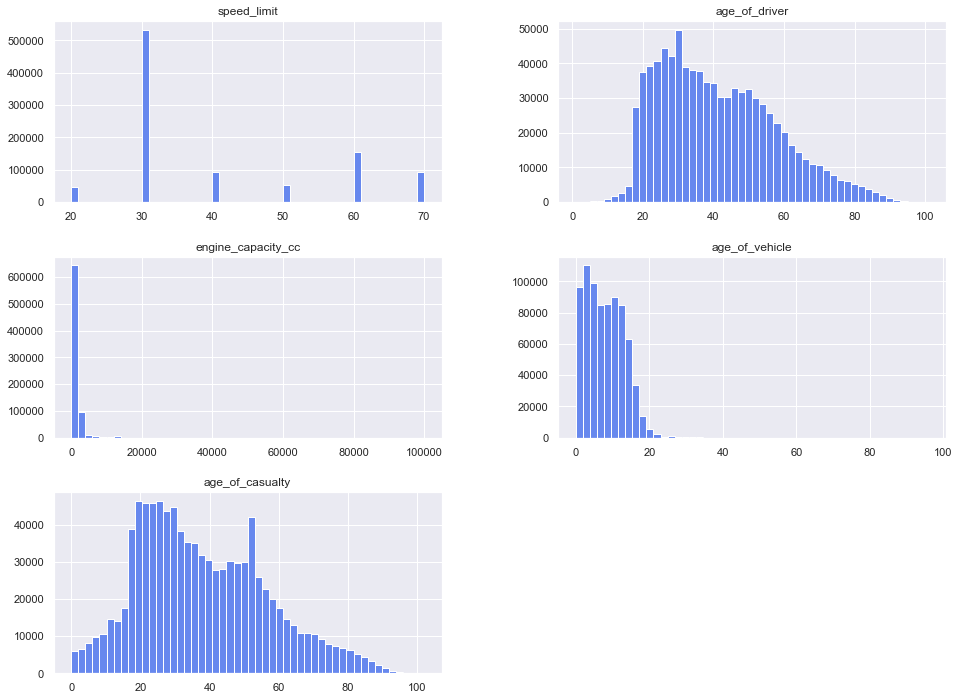

In [30]:
# set seaborn theme
sns.set_theme(style='darkgrid', palette='coolwarm')


# visualize distribution of all numerical variables

# drop the longitude and latitude numerical variables as they represent geographical data
numerical_vis = trainset.drop(columns=['longitude', 'latitude', 'time', 'date'])

# plot a histogram containing all numerical variables in the dataset.
numerical_vis.hist(bins=50, figsize=(16,12), histtype='bar')

We observe the distribution of age of drivers and casualties respectively are uniform and mirror each other. However age of casualty looks to be bi-modal with a high spike just between 50-60 years. Most vehicles involved in accidents are under 20 years old.

### 4.2 Exploring Date-time data for accidents

In [31]:
# creating a new dataframe and grouping the casualty class based on weekly frequency
df3 = trainset[['date', 'accident_index', 'casualty_class']]
casclass_count = df3.set_index('date').groupby([pd.Grouper(freq='W'), 'casualty_class']).size()

In [32]:
# creating a table by pivoting a level
casclass = casclass_count.rename_axis(['Week', 'casualty_class'])\
                                      .unstack('casualty_class')\
                                      .rename({1:'Driver or rider', 2:'Passenger', 3:'Pedestrian'}, axis='columns')
casclass.head()

casualty_class,Driver or rider,Passenger,Pedestrian
Week,,,
2016-01-03,931,510,120
2016-01-10,3542,1174,438
2016-01-17,4156,1285,476
2016-01-24,3755,1142,481
2016-01-31,3534,1105,487


In [33]:
# Generating the percentage of the casuality class
casclass['sum'] = casclass.sum(axis=1)
casclass = casclass.join(casclass.div(casclass['sum'], axis=0), rsuffix='_percentage')
casclass.head()

casualty_class,Driver or rider,Passenger,Pedestrian,sum,Driver or rider_percentage,Passenger_percentage,Pedestrian_percentage,sum_percentage
Week,,,,,,,,
2016-01-03,931,510,120,1561,0.596413,0.326714,0.076874,1.0
2016-01-10,3542,1174,438,5154,0.687233,0.227784,0.084983,1.0
2016-01-17,4156,1285,476,5917,0.702383,0.217171,0.080446,1.0
2016-01-24,3755,1142,481,5378,0.698215,0.212347,0.089438,1.0
2016-01-31,3534,1105,487,5126,0.689426,0.215568,0.095006,1.0


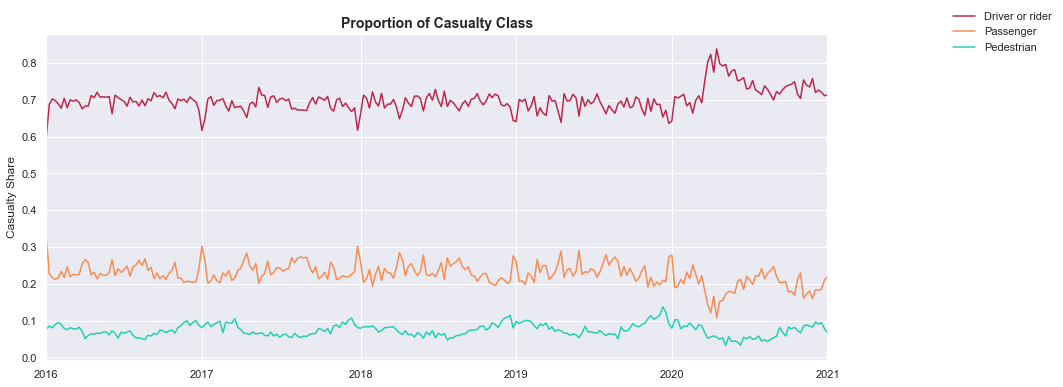

In [34]:
# preparing the data and plotting the graph
casclass_df = casclass[['Driver or rider_percentage', 'Passenger_percentage', 'Pedestrian_percentage']]

sns.set_style('darkgrid')
fig, axis = plt.subplots(figsize=(14,6))
colors=['#be254a', '#f88c51', '#20d0b2']

casclass_df.plot(color=colors, ax=axis)
axis.set_title('Proportion of Casualty Class', fontsize=14, fontweight='bold')
axis.set(ylabel='Casualty Share', xlabel='')
axis.legend(labels=['Driver or rider', 'Passenger', 'Pedestrian'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

From the above graph we see that  Driver or rider as the major road user group cause the greatest number of casulaities and fatlities every year. There's been a noticeable spike in the earlier part of 2020 for drivers and riders.

In [35]:
# creating a new dataframe and grouping the accident severity based on weekly frequency
df4 = trainset[['date', 'accident_index', 'accident_severity']]
fatalcount = df4.set_index('date').groupby([pd.Grouper(freq='W'), 'accident_severity']).size()

In [36]:
# creating a table by pivoting a level
acc_sev = fatalcount.rename_axis(['Week', 'accident_severity'])\
                                      .unstack('accident_severity')\
                                      .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
acc_sev.head()

accident_severity,Fatal,Serious,Slight
Week,,,
2016-01-03,40,270,1251
2016-01-10,69,769,4316
2016-01-17,84,811,5022
2016-01-24,50,822,4506
2016-01-31,120,718,4288


In [37]:
# Generating the percentage of the accident severity
acc_sev['sum'] = acc_sev.sum(axis=1)
acc_sev = acc_sev.join(acc_sev.div(casclass['sum'], axis=0), rsuffix='_percentage')
acc_sev.head()

accident_severity,Fatal,Serious,Slight,sum,Fatal_percentage,Serious_percentage,Slight_percentage,sum_percentage
Week,,,,,,,,
2016-01-03,40,270,1251,1561,0.025625,0.172966,0.801409,1.0
2016-01-10,69,769,4316,5154,0.013388,0.149205,0.837408,1.0
2016-01-17,84,811,5022,5917,0.014196,0.137063,0.848741,1.0
2016-01-24,50,822,4506,5378,0.009297,0.152845,0.837858,1.0
2016-01-31,120,718,4288,5126,0.023410,0.140070,0.836520,1.0


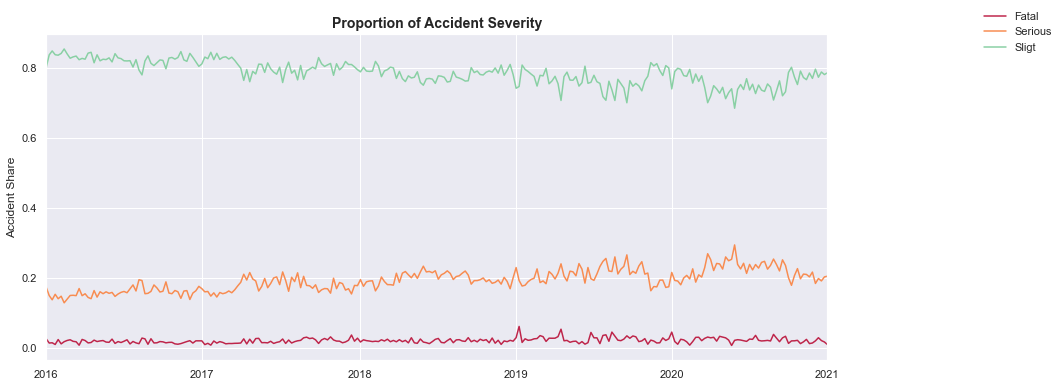

In [38]:
# preparing the data and plotting the graph
accsev_df = acc_sev[['Fatal_percentage', 'Serious_percentage', 'Slight_percentage']]
sns.set_style('darkgrid')
fig, axis = plt.subplots(figsize=(14,6))
colors=['#be254a', '#f88c51', '#89d0a4']

accsev_df.plot(color=colors, ax=axis)
axis.set_title('Proportion of Accident Severity', fontsize=14, fontweight='bold')
axis.set(ylabel='Accident Share', xlabel='')
axis.legend(labels=['Fatal', 'Serious', 'Sligt'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

We can observe that there are signifcantly higher slight severity accidents as compared to Fatal and Serious accidents. This may be indicative of the ability of the local authorities to respond swiftly to accidents that could potentially be fatal, which reduces the propotion of Fatal accidents, and most non-fatal accidents are logged as injury based reporting.

In [39]:
# creating a new dataframe with date details based on monthly frequency
totalacc = pd.DataFrame(trainset.set_index('date').resample('M').size())
totalacc.columns = ['Accidents']

In [40]:
# creating a new column for the 10 month moving average
totalacc['rolling'] = totalacc['Accidents'].rolling(window=12).mean()
totalacc.tail()

,Accidents,rolling
date,,
2020-08-31,14170,11599.500000
2020-09-30,13852,11869.750000
2020-10-31,13037,12069.250000
2020-11-30,13812,12003.083333
2020-12-31,15293,12173.583333


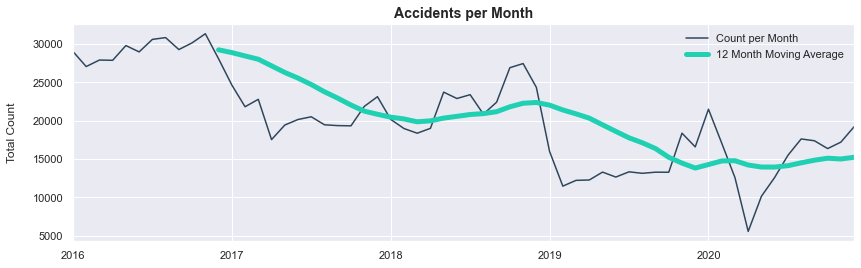

In [41]:
# preparing the plot and the details of the graph
sns.set_style('darkgrid')
fig, axis = plt.subplots(figsize=(14,4))

df2.set_index('date').resample('M').size().plot(label='Count per Month', color='#2e465b', ax=axis)
df2.set_index('date').resample('M').size().rolling(window=12).mean()\
                           .plot(color='#20d0b2', linewidth=5, label='12 Month Moving Average', ax=axis)

axis.set_title('Accidents per Month', fontsize=14, fontweight='bold')
axis.set(ylabel='Total Count\n', xlabel='')
axis.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)

The 12 month moving average timeseries plot indicates a non-negligible uptick in accidents towards the end of every year, which may potentially be indicative of a seasonal pattern, possibly during the holiday season where people travel for Christmas or due to changing weather patterns. Another important observation we notice is that accident numbers dipped significantly in the early months of 2020 before increasing later on.

[Text(0, 0.5, 'Total Counts')]

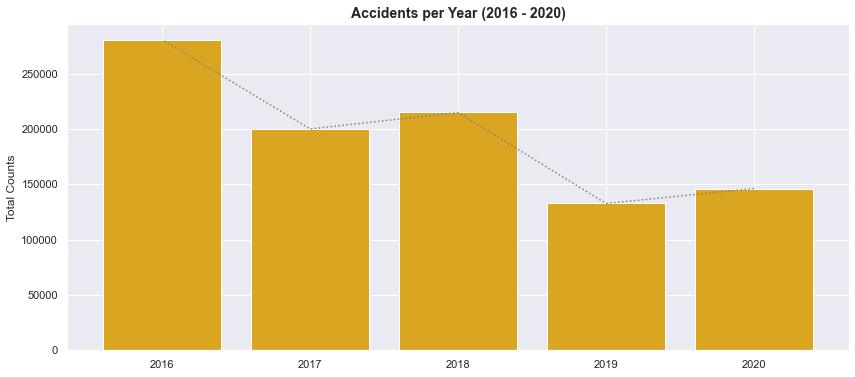

In [42]:
# Preparing the plot for accidents per year
total_count = trainset['date'].dt.year.value_counts().sort_index(ascending=False)
sns.set_style('darkgrid')
fig, axis = plt.subplots(figsize=(14,6))

# plot
axis.bar(total_count.index, total_count.values, color='goldenrod')
axis.plot(total_count, linestyle=':', color='grey')
axis.set_title('Accidents per Year (2016 - 2020)', fontsize=14, fontweight='bold')
axis.set(ylabel='Total Counts')

The number of accidents for the year 2016 - 2020 shows that the accidents have substancial decrease over the years. Improved road maintenance and developments of road safety measures shows a decline in the accidents and the 2020 figures were affected by COVID-19 pandemic.   

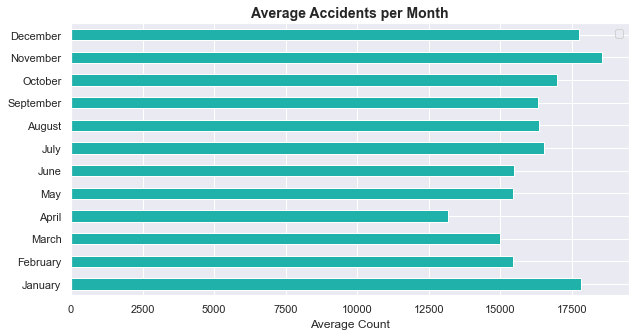

In [43]:
# Average accidents happening on month

mncounts = pd.DataFrame(trainset.set_index('date').resample('M')['accident_index'].size().reset_index())
mncounts.columns = ['date', 'Count']
month_nm = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_ex = mncounts['date'].dt.month_name()
month_averages = pd.DataFrame(mncounts.groupby(month_ex)['Count'].mean().reset_index())
month_averages.columns = ['Month', 'Average_Accidents']
month_averages.set_index('Month', inplace=True)

# plotting the graph
fig, ax = plt.subplots(figsize=(10,5))
month_averages.reindex(month_nm).plot(kind='barh', ax=ax, color = 'lightseagreen')
ax.set_title('Average Accidents per Month', fontsize=14, fontweight='bold')
ax.set(xlabel='Average Count', ylabel='')
ax.legend('')

A lot of accidents have happened over the start of the year January and in November, before the Christmas break. It looks like more people head to work to pick extra shifts during Christmas job requirements.

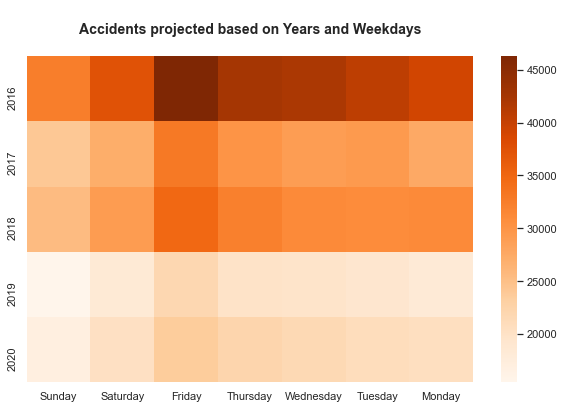

In [44]:
# count of accidents on weekdays over the last 5 years
weekday = trainset['date'].dt.day_name()
year    = trainset['date'].dt.year
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

table3 = trainset.groupby([year, weekday]).size()
table3 = table3.rename_axis(['year', 'weekday'])\
               .unstack('weekday')\
               .reindex(columns=days)

# plotting the heat graph
plt.figure(figsize=(10,6))
sns.heatmap(table3, cmap='Oranges')
plt.title('\nAccidents projected based on Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

The heatmap above indicates an interesting observation in that, it appears that Fridays have consistently been the day with the highest number of accidents across all years, even as accident numbers fell as the years progressed. Which may be indicative of certain behavioural patterns on fridays leading to more accidents.

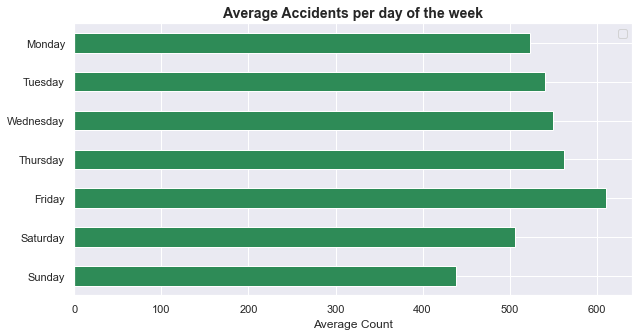

In [45]:
# Average accidents happening on weekdays
wdcounts = pd.DataFrame(trainset.set_index('date').resample('1d')['accident_index'].size().reset_index())
wdcounts.columns = ['date', 'Count']

weekday = wdcounts['date'].dt.day_name()
wd_averages = pd.DataFrame(wdcounts.groupby(weekday)['Count'].mean().reset_index())
wd_averages.columns = ['Weekday', 'Average_Accidents']
wd_averages.set_index('Weekday', inplace=True)

# plotting the graph
fig, ax = plt.subplots(figsize=(10,5))
wd_averages.reindex(days).plot(kind='barh', ax=ax, color = 'seagreen')
ax.set_title('Average Accidents per day of the week', fontsize=14, fontweight='bold')
ax.set(xlabel='Average Count', ylabel='')
ax.legend('')

We observe a similar pattern in accidents during Fridays as previously mentioned. Fridays have a markeable increase in the average accident counts, with it dipping significantly on the weekends

Text(0, 0.5, 'Number of accidents')

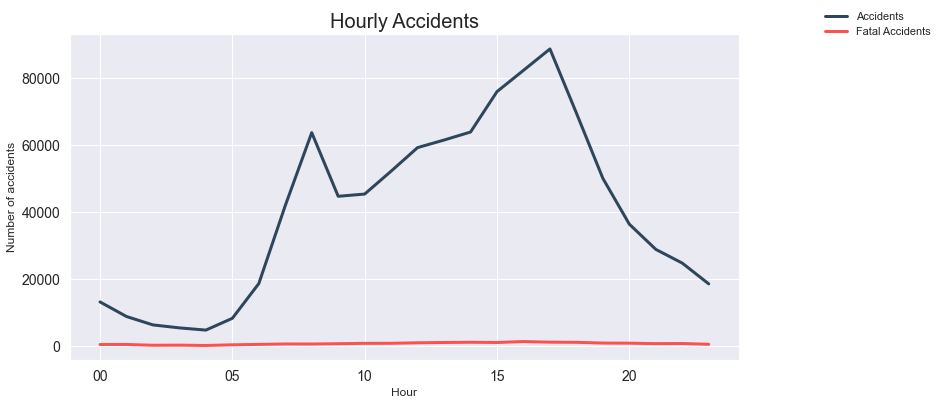

In [46]:
#Daily Accidents
#total number of accidents per month
df1 = trainset.sort_values('hour')
accident_per_hour= df1.groupby('hour').count()['accident_index']
accident_per_hour.plot(color='#2e465b', linewidth=3, figsize=(12,6))

#fatal case
fatal = df1[df1['accident_severity']=="Fatal"]
fatal= fatal.groupby('hour').count()['accident_index']
fatal.plot(color='#ff5050', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Accidents', 'Fatal Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# title and labels
plt.title('Hourly Accidents', fontsize=20)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of accidents', fontsize=12)


We observe the highest occurrence of accidents is during peak traffic hours in the morning and later in the evening. Nonetheless, no significant trends in Fatal accidents can be observed across different times.

### 4.3 Driver and Casualty Features in Accidents

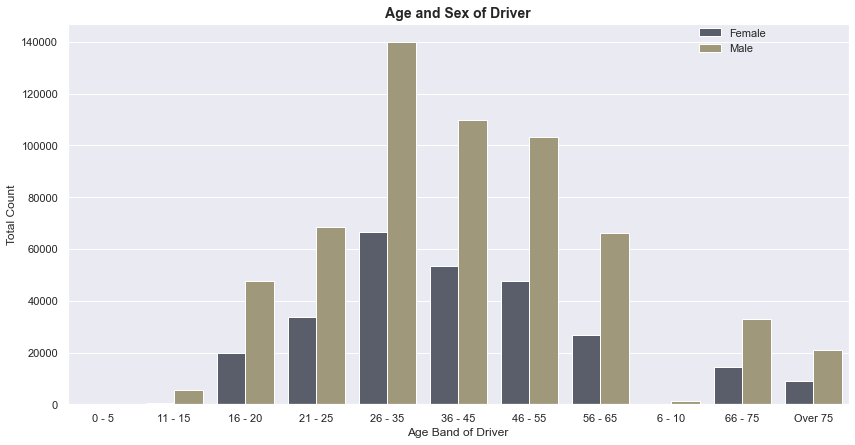

In [47]:
# creating a new dataframe and renaming the columns based out of grouping
drivers = trainset.groupby(['age_band_of_driver', 'sex_of_driver']).size().reset_index()
drivers.columns = ['age_band_of_driver', 'sex_of_driver','total']

# seaborn barplot distribution
sns.set_style('darkgrid')
fig, axis = plt.subplots(figsize=(14, 7))
sns.barplot(y='total', x='age_band_of_driver', hue='sex_of_driver', data=drivers, palette='cividis')

axis.set_title('Age and Sex of Driver', fontsize=14, fontweight='bold')
axis.set(xlabel='Age Band of Driver', ylabel='Total Count')
axis.legend(bbox_to_anchor=(0.9, 1.), borderaxespad=0., frameon=False)

We note above that Males (particularly those in the 26-35 band) are consistently involved in more accidents than Females across all age groups, which may highlight behavioural tendencies of more Males to engage in more risky behaviour whilst driving (such as drunk driving, speeding, etc). However, this may also be owing to less Females driving on the road in proportion to Males.

Text(0.5, 1.0, 'Distribution of Casualty Types 2016-2020')

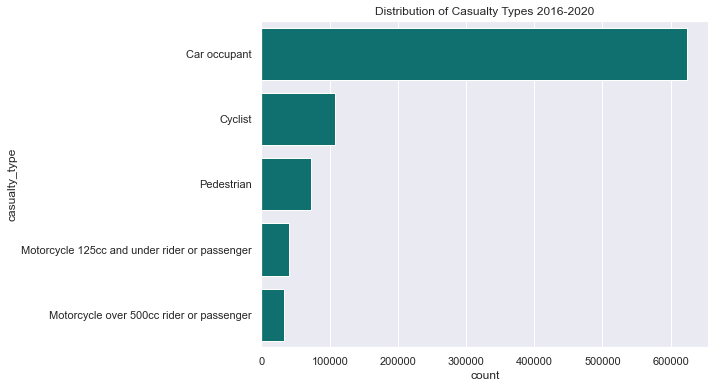

In [48]:
# increase the size of the following seaborn countplot
sns.set(rc={'figure.figsize':(8,6)})

# use the seaborn countplot function and only return top 5 results
ax = sns.countplot(y='casualty_type',data=trainset,color='teal',
            order=trainset.casualty_type.value_counts().iloc[:5].index)

# set the title of the plot
ax.set_title('Distribution of Casualty Types 2016-2020')

Given the prevalence of Cars in the UK, it is no surprise that the majority of casualties are Car occupants. We also observe that the 2nd most common are Cyclists, more so than many other classes including Motorcycles.

Text(0.5, 1.0, 'Distribution of IMD of Driver 2016-2020')

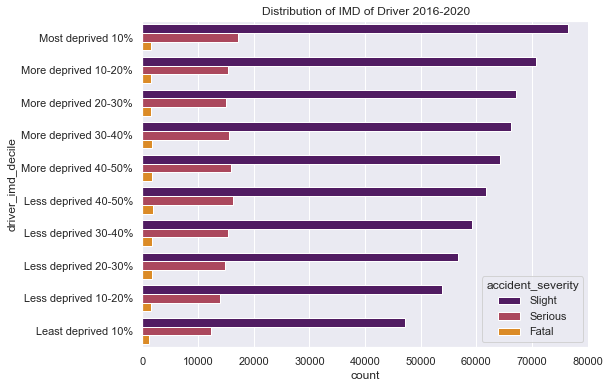

In [49]:
# use the seaborn countplot function and only return all results in descending order
ax = sns.countplot(y='driver_imd_decile',data=trainset,palette='inferno', hue='accident_severity',
            order=trainset.driver_imd_decile.value_counts().index)

# set the title of the plot
ax.set_title('Distribution of IMD of Driver 2016-2020')

It seems that there is a proportional increase in the number of accidents as the deprivation index of the driver worsens. In other words, drivers considered more income deprived are likelier to get into accidents across all severities

### 4.4 Vehicle Features in Accidents

Text(0.5, 1.0, 'Distribution of Vehicle Types 2016-2020')

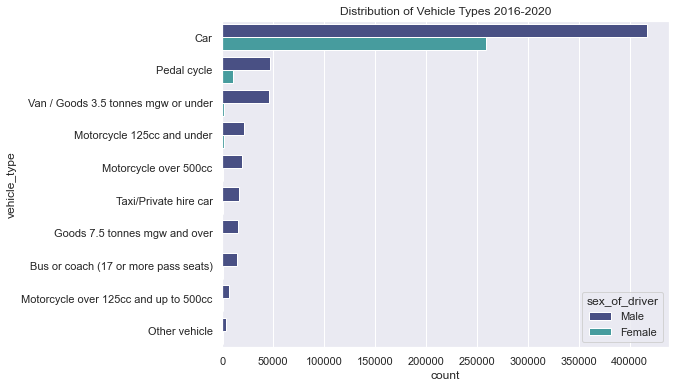

In [50]:
# increase the size of the following seaborn countplot
sns.set(rc={'figure.figsize':(8,6)})

# use the seaborn countplot function and only return top 5 results
ax = sns.countplot(y='vehicle_type',data=trainset,palette='mako', hue="sex_of_driver"
            ,order=trainset.vehicle_type.value_counts().iloc[:10].index)

# set the title of the plot
ax.set_title('Distribution of Vehicle Types 2016-2020')

Text(0.5, 1.0, 'Distribution of Vehicle Type and Accident Severity')

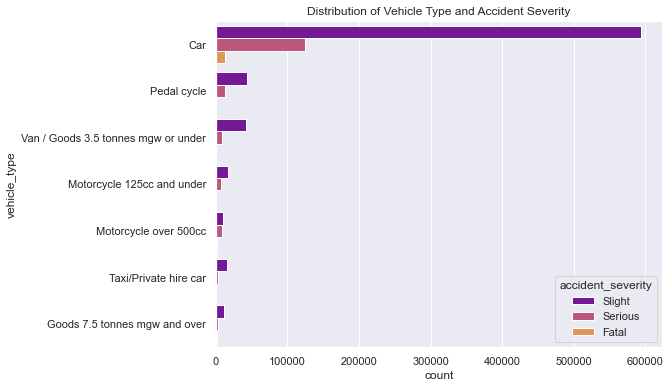

In [51]:
# use the seaborn countplot function and only return all results in descending order
ax = sns.countplot(y='vehicle_type',data=trainset,palette='plasma', hue='accident_severity',
            order=trainset.vehicle_type.value_counts().iloc[:7].index)

# set the title of the plot
ax.set_title('Distribution of Vehicle Type and Accident Severity')

Looking at the relative distributions of vehicle types in accidents, we note the highest in absolute values to be Cars. What we note from here however, is that the proportion of Serious accidents for Motorcycles 500cc above is much higher, almost proportional to Slight severity

### 4.5 Environmental Factors of Accidents

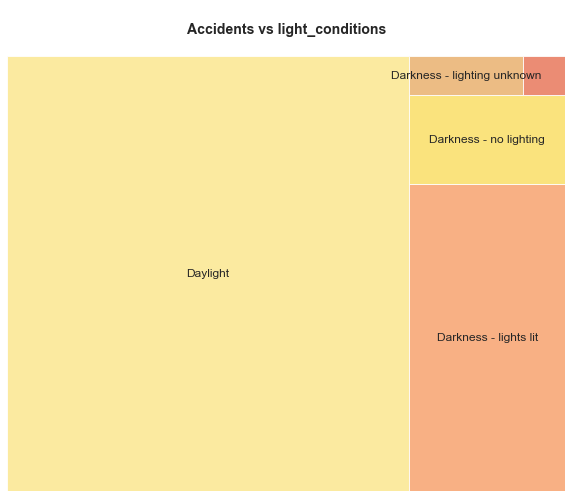

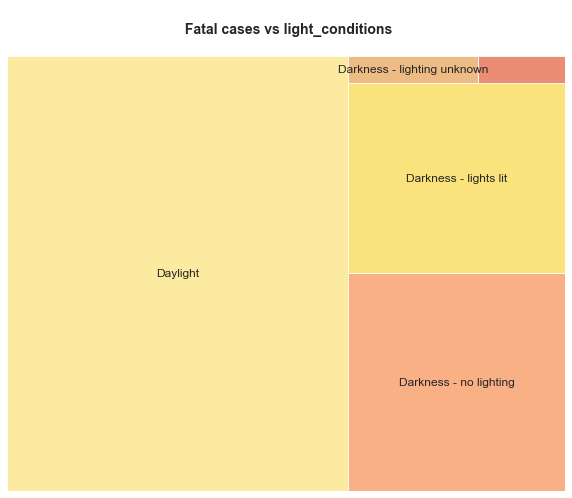

In [52]:
#light conditions
#prepare the data
light_conditions = trainset.groupby('light_conditions').size()\
                                                .reset_index(name='counts')\
                                                    .sort_values(by='counts', ascending=False). head(8)
#draw a treemap
fig, ax = plt.subplots(1, figsize = (10,8))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
squarify.plot(sizes=light_conditions['counts'], 
              label=light_conditions['light_conditions'][:4], color = colors,
              alpha=.8 )
plt.title('\nAccidents vs light_conditions\n', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

#fatal case
fatal = trainset[trainset['accident_severity']=="Fatal"]


weather_conditions = fatal.groupby('light_conditions').size()\
                                                .reset_index(name='counts')\
                                                    .sort_values(by='counts', ascending=False). head(8)
#draw a treemap
fig, ax = plt.subplots(1, figsize = (10,8))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
squarify.plot(sizes=weather_conditions['counts'], 
              label=weather_conditions['light_conditions'][:4], color = colors,
              alpha=.8 )
plt.title('\n Fatal cases vs light_conditions\n', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

Accidents, both deadly and non-fatal, were most common during daylight hours. When comparing the two maps, we can observe that a far higher percentage of deadly incidents occurred in the dark, particularly in the absence of lighting. Improving nighttime lighting in high-risk areas may assist to reduce the overall incidence of fatal accidents.

<AxesSubplot:xlabel='road_surface_conditions', ylabel='age_of_driver'>

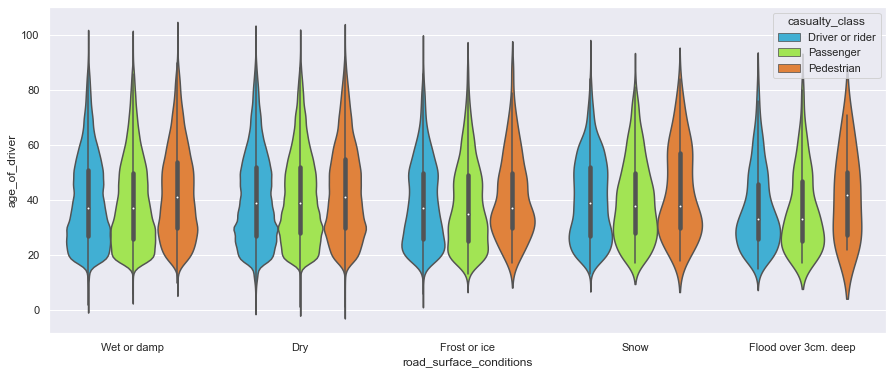

In [53]:
plt.figure(figsize=(15,6))
sns.violinplot(x='road_surface_conditions',y="age_of_driver",data=trainset, hue='casualty_class', palette='turbo')

The violin plot shows that the age of the drivers across different road conditions that falls within the major three categories. We could see that the median age in the most accident road (Wet / dry) conditions is around 40. and as the age increases the accident rate decreases as we could observe lesser width in the thirs quartile. 

<AxesSubplot:xlabel='accident_severity', ylabel='count'>

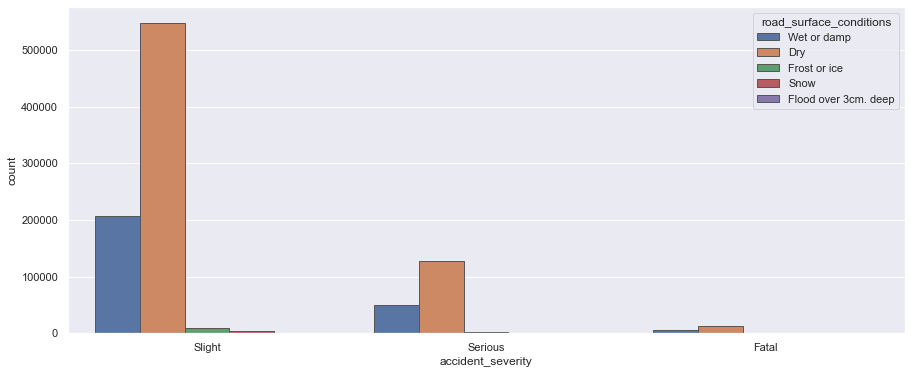

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x="accident_severity", hue="road_surface_conditions", edgecolor=".34",data=trainset)

And finally when accident severity is checked with the road conditions dry and wet had most of the accidents as well all these accidents were mostly of slight severity. 

### 4.6 Road related factors influencing Accidents

Text(0.5, 1.0, 'Distribution of Accidents in different Speed Limits')

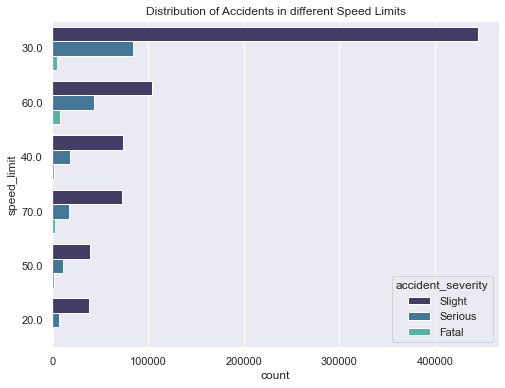

In [55]:
# plot the data for speed limits and accidents
ax = sns.countplot(y='speed_limit',data=trainset,palette='mako', hue='accident_severity',
            order=trainset.speed_limit.value_counts().index)

ax.set_title("Distribution of Accidents in different Speed Limits")

The above shows that most accidents occur in the 30km speed limit zones, however, the proportion of Fatal accidents is the highest in 60km zones and are generally higher in higher limit zones.

Text(0.5, 1.0, 'Proportion of Accident Severities')

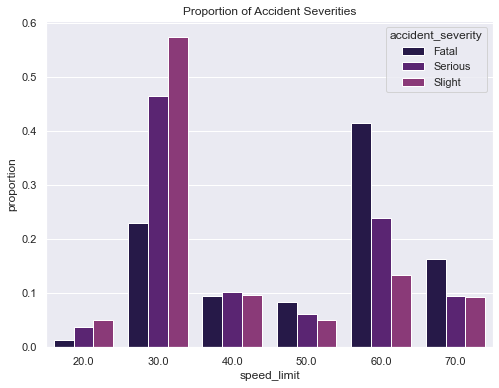

In [56]:
# plot the proportion of accident severities accross different speed limits
sns.set_palette('magma')

data = trainset
x, y, hue = "speed_limit", "proportion", "accident_severity"

ax = (df2[x]
 .groupby(df2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

ax.set_title("Proportion of Accident Severities")

We note that even though the total number of accidents is lower in areas with higher speed limits, the proportionality of Fatal accidents is much higher. Coming to 50km and above, accidents are more likely to be fatal than Slight or Serious

Geographical visualization of accidents seem to highlight more accidents in densely populated regions of the UK such as near London, Birmingham, and other city areas


*Geographical Visualization removed due to file size restrictions*

Slightly contrary to all Accidents, our Fatal accidents are primarily concentrated in the West Midlands and northern regions around Liverpool. With less so in the south-east region around London.

## 5. Cleaning Dataset and Transformations

### 5.1 Feature Engineering

Given the UK Dept of Transport is primarily concerned with predicting features leading up to Fatality of an Accident, we must have a variable that can represent Fatal accidents as such. Therefore, we'll create a new column that will represent accident Fatality, and be our predictor variable in later modelling.

In [59]:
# define a function to create the required feature column on a given dataset
def extractfatality(data, column, target):
    
    # create new column equivalent to true or false from the given column target combination
    data[target] = data[column] == target

    # replace true, and false values in the new column as 1, and 0 respectively
    data.replace({True:1,False:0}, inplace=True)

    # drop the original column used to create our feature column
    data.drop(column, axis=1, inplace=True)

    return data

# run the function on both training and test sets
trainset = extractfatality(trainset, 'accident_severity', 'Fatal')
testset = extractfatality(testset, 'accident_severity', 'Fatal')

In [60]:
# convert the speed limit variable to 'category'
trainset['speed_limit'] = trainset.speed_limit.astype('category')
testset['speed_limit'] = testset.speed_limit.astype('category')

In [61]:
# inspect whether the feature has been created as intended
trainset.head()

,accident_index,longitude,latitude,date,day_of_week,time,first_road_class,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_type,hour,month,Fatal
781766,2018430319777,-0.935210,51.782854,2018-10-15,Monday,1900-01-01 16:22:00,A,50.0,Daylight,Raining no high winds,Wet or damp,Car,Male,50.0,46 - 55,1995.0,14.0,More deprived 10-20%,Urban area,Driver or rider,Male,50.0,Car occupant,16,2018:10,0
580557,2017610047817,-2.771363,51.787504,2017-11-19,Sunday,1900-01-01 00:54:00,A,70.0,Darkness - no lighting,Raining no high winds,Wet or damp,Car,Male,45.0,36 - 45,1995.0,11.0,More deprived 40-50%,Rural,Driver or rider,Male,32.0,Car occupant,00,2017:11,0
819043,2018471803415,-0.348243,50.834349,2018-06-21,Thursday,1900-01-01 18:36:00,Unclassified,30.0,Daylight,Fine no high winds,Dry,Pedal cycle,Female,23.0,21 - 25,NaN,NaN,Less deprived 20-30%,Urban area,Driver or rider,Male,19.0,Motorcycle 125cc and under rider or passenger,18,2018:06,0
311068,2016530128642,-1.889258,51.896005,2016-11-17,Thursday,1900-01-01 09:20:00,A,60.0,Daylight,Raining no high winds,Wet or damp,Car,Male,80.0,Over 75,1198.0,10.0,Less deprived 40-50%,Rural,Driver or rider,Male,80.0,Car occupant,09,2016:11,0
676227,2018135AE0924,-1.633923,53.750355,2018-10-13,Saturday,1900-01-01 15:00:00,A,30.0,Daylight,Fine no high winds,Wet or damp,Car,NaN,NaN,NaN,1598.0,12.0,NaN,NaN,Driver or rider,Female,24.0,Car occupant,15,2018:10,0


### 5.2 Handling Missing Values

To obtain the most optimal performance of the machine learning algorithms on our model, we must ensure we have clean data that does not have missing values. Whilst it is not uncommon for us to come accross missing values in real datasets, such cases may lead to unpredictable results in machine learning and as such we must clean them

For Categorical features, we will be removing missing values (rows) whilst missing numerical features will be imputed.

In [62]:
trainset.isnull().sum()

accident_index                  0
longitude                     251
latitude                      251
date                            0
day_of_week                     0
time                            0
first_road_class                0
speed_limit                   110
light_conditions               33
weather_conditions          23454
road_surface_conditions      4967
vehicle_type                 2296
sex_of_driver               68689
age_of_driver               98115
age_band_of_driver          98115
engine_capacity_cc         202088
age_of_vehicle             200676
driver_imd_decile          182638
driver_home_area_type      182383
casualty_class                  0
sex_of_casualty               620
age_of_casualty             13452
casualty_type                3251
hour                            0
month                           0
Fatal                           0
dtype: int64

Removal of null values in non-numeric features

In [63]:
# define function to drop the na for category and remove accident index and age band of driver
def dropna(data, cols):

    # drop all null values in the specified subset of columns
    data = data.dropna(subset=cols)

    # drop the columns specified
    data.drop(columns=['age_band_of_driver', 'month', 'accident_index'], axis=1, inplace=True)

    # return the updated data
    return data

# define the subset of columns for non-numeric data
subset = ['longitude', 'latitude', 'casualty_type', 'first_road_class','driver_home_area_type',
        'light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type',
        'vehicle_type', 'sex_of_driver', 'sex_of_casualty', 'casualty_type', 'speed_limit',
         'casualty_class', 'driver_imd_decile']
# whilst in numeric format, we remove longitude and latitude as it represents geographical data


# implement the dropna function for our train and test sets
trainset = dropna(trainset, subset)
testset = dropna(testset, subset)

In [64]:
trainset.isnull().sum()

longitude                       0
latitude                        0
date                            0
day_of_week                     0
time                            0
first_road_class                0
speed_limit                     0
light_conditions                0
weather_conditions              0
road_surface_conditions         0
vehicle_type                    0
sex_of_driver                   0
age_of_driver               12627
engine_capacity_cc         116318
age_of_vehicle             115066
driver_imd_decile               0
driver_home_area_type           0
casualty_class                  0
sex_of_casualty                 0
age_of_casualty              8102
casualty_type                   0
hour                            0
Fatal                           0
dtype: int64

In [65]:
num_cols = trainset.select_dtypes('number').columns
print(f"Number of numerical columns: {len(num_cols)}")

Number of numerical columns: 7


In [66]:
num_cols_with_null = num_cols[trainset[num_cols].isnull().mean() > 0]
print(f"numerical columns with null values ({len(num_cols_with_null)}): \n{num_cols_with_null}\n")

numerical columns with null values (4): 
Index(['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle',
       'age_of_casualty'],
      dtype='object')



In [67]:
# import the SimpleImputer class and instantiate the object
from sklearn.impute import SimpleImputer

# instantiate imputer object with median
imputer = SimpleImputer(strategy ='median')

# define a function that imputes missing values on a given train,test dataset pair.
def imputefunc(trainset, testset):
    
    # seperate features into numerical and categorical sets
    trainset_num = trainset.select_dtypes(include=['float64'])
    trainset_cat = trainset.select_dtypes(include=['object', 'int64', 'datetime64', 'category'])

    testset_num = testset.select_dtypes(include=['float64'])
    testset_cat = testset.select_dtypes(include=['object', 'int64', 'datetime64', 'category'])

    # fit the impute on our training set and subsequently transform both sets
    trainset = pd.DataFrame(imputer.fit_transform(trainset_num),columns = trainset_num.columns)
    testset = pd.DataFrame(imputer.transform(testset_num), columns = testset_num.columns)
    
    # reset the index of both our sets as concatenation requires consistent indexes
    trainset_cat.reset_index(level=0, inplace=True)
    testset_cat.reset_index(level=0, inplace=True)  

    # drop the old indexes of the train and test set categoricals
    trainset_cat.drop(columns='index', axis=1, inplace=True)
    testset_cat.drop(columns='index', axis=1, inplace=True)

    # next we join back the two dataframes 
    trainset = pd.concat([trainset, trainset_cat], axis=1)
    testset = pd.concat([testset, testset_cat], axis=1)

    return trainset, testset


trainset, testset = imputefunc(trainset, testset)

In [68]:
# verify and inspect whether the imputing has been complete
# if imputing has been complete, there will be no null values in the given numerical variables
trainset.isnull().sum()

longitude                  0
latitude                   0
age_of_driver              0
engine_capacity_cc         0
age_of_vehicle             0
age_of_casualty            0
date                       0
day_of_week                0
time                       0
first_road_class           0
speed_limit                0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
vehicle_type               0
sex_of_driver              0
driver_imd_decile          0
driver_home_area_type      0
casualty_class             0
sex_of_casualty            0
casualty_type              0
hour                       0
Fatal                      0
dtype: int64

In [69]:
trainset.head()

,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,date,day_of_week,time,first_road_class,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,casualty_type,hour,Fatal
0,-0.935210,51.782854,50.0,1995.0,14.0,50.0,2018-10-15,Monday,1900-01-01 16:22:00,A,50.0,Daylight,Raining no high winds,Wet or damp,Car,Male,More deprived 10-20%,Urban area,Driver or rider,Male,Car occupant,16,0
1,-2.771363,51.787504,45.0,1995.0,11.0,32.0,2017-11-19,Sunday,1900-01-01 00:54:00,A,70.0,Darkness - no lighting,Raining no high winds,Wet or damp,Car,Male,More deprived 40-50%,Rural,Driver or rider,Male,Car occupant,00,0
2,-0.348243,50.834349,23.0,1597.0,7.0,19.0,2018-06-21,Thursday,1900-01-01 18:36:00,Unclassified,30.0,Daylight,Fine no high winds,Dry,Pedal cycle,Female,Less deprived 20-30%,Urban area,Driver or rider,Male,Motorcycle 125cc and under rider or passenger,18,0
3,-1.889258,51.896005,80.0,1198.0,10.0,80.0,2016-11-17,Thursday,1900-01-01 09:20:00,A,60.0,Daylight,Raining no high winds,Wet or damp,Car,Male,Less deprived 40-50%,Rural,Driver or rider,Male,Car occupant,09,0
4,0.161043,51.094410,75.0,1600.0,5.0,76.0,2020-01-25,Saturday,1900-01-01 20:06:00,B,60.0,Darkness - no lighting,Fine no high winds,Wet or damp,Car,Male,Least deprived 10%,Urban area,Passenger,Female,Car occupant,20,0


### 5.3 Encoding Dummy Variables

To prepare our data for the Machine Learning algorithms, we must also get 'Dummy' variables for our categorical variables.

In [70]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767424 entries, 0 to 767423
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   longitude                767424 non-null  float64       
 1   latitude                 767424 non-null  float64       
 2   age_of_driver            767424 non-null  float64       
 3   engine_capacity_cc       767424 non-null  float64       
 4   age_of_vehicle           767424 non-null  float64       
 5   age_of_casualty          767424 non-null  float64       
 6   date                     767424 non-null  datetime64[ns]
 7   day_of_week              767424 non-null  object        
 8   time                     767424 non-null  datetime64[ns]
 9   first_road_class         767424 non-null  object        
 10  speed_limit              767424 non-null  category      
 11  light_conditions         767424 non-null  object        
 12  weather_conditio

In [73]:
# import the onehotencoder class to implement encoding
from sklearn.preprocessing import OneHotEncoder


# set aside the categorical columns as a list object 
catcols = trainset.select_dtypes(['object', 'category']).columns.tolist()

# define the get dummies function to return encoded train and test sets
def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    # the old_col_name will be taken from the categorical columns list defined previously
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the testset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in catcols:
    trainset, testset = get_dummies(trainset, testset, col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()



,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,date,day_of_week,time,first_road_class,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,casualty_type,hour,Fatal,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.935210,51.782854,50.0,1995.0,14.0,50.0,2018-10-15,Monday,1900-01-01 16:22:00,A,50.0,Daylight,Raining no high winds,Wet or damp,Car,Male,More deprived 10-20%,Urban area,Driver or rider,Male,Car occupant,16,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.771363,51.787504,45.0,1995.0,11.0,32.0,2017-11-19,Sunday,1900-01-01 00:54:00,A,70.0,Darkness - no lighting,Raining no high winds,Wet or damp,Car,Male,More deprived 40-50%,Rural,Driver or rider,Male,Car occupant,00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.348243,50.834349,23.0,1597.0,7.0,19.0,2018-06-21,Thursday,1900-01-01 18:36:00,Unclassified,30.0,Daylight,Fine no high winds,Dry,Pedal cycle,Female,Less deprived 20-30%,Urban area,Driver or rider,Male,Motorcycle 125cc and under rider or passenger,18,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.889258,51.896005,80.0,1198.0,10.0,80.0,2016-11-17,Thursday,1900-01-01 09:20:

In [74]:
# with our dummy variables in place, we no longer need old columns
def dropfunc(data, column_list):
    for column in data:
        if column in column_list:
            del data[column]

# implement the above function on the categorical columns list previously defined
dropfunc(trainset, catcols)
dropfunc(testset, catcols)

trainset.head()


,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,date,time,Fatal,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.935210,51.782854,50.0,1995.0,14.0,50.0,2018-10-15,1900-01-01 16:22:00,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.771363,51.787504,45.0,1995.0,11.0,32.0,2017-11-19,1900-01-01 00:54:00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.348243,50.834349,23.0,1597.0,7.0,19.0,2018-06-21,1900-01-01 18:36:00,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.889258,51.896005,80.0,1198.0,10.0,80.0,2016-11-17,1900-01-01 09:20:00,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.161043,51.094410,75.0,1600.0,5.0,76.0,2020-01-25,1900-01-01 20:06:00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [75]:
# verify the dimensions of the datasets following encoding
print(trainset.shape, testset.shape)

(767424, 112) (191929, 112)


### 5.4 Feature Scaling

Feature scaling is an important data transformation step that brings all of our features in line within a common scale. Differing scales (e.g Ages that range from 0-80 and Salaries that range up to millions) may cause issues in some machine learning algorithms and therefore its imperative that we scale our data to obtain optimal performance 

We *fit* our training data onto the training data to ensure there is no data leakage onto the training or validation set

In [76]:
# import the standard scaler class and instantiate the object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# seperate into predictor and target sets, we do not scale our target
trainset_target = trainset["Fatal"].values
# we do not include and scale date + accident index as part of modelling going forward
trainset_predictors = trainset.drop(columns=["Fatal", "date", "time", "longitude", "latitude"], axis=1)

# call the fit and transform method on our predictors
scaled_vals = scaler.fit_transform(trainset_predictors)

# put the scaled values back into the trainset dataframe
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['Fatal'] = trainset_target

# inspect the data
trainset.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Fatal
0,0.544983,0.112928,1.254158,0.631427,2.473907,-0.39562,-0.364123,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,4.051242,-0.454343,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,2.846435,-0.343233,-0.343072,-0.339197,-0.368347,-0.329385,0.542695,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,3.276572,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495,0
1,0.242464,0.112928,0.655658,-0.329060,-0.404219,-0.39562,2.746327,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,-0.246838,-0.454343,2.984948,-0.482452,-0.081494,3.903984,-1.642023,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,-0.351317,-0.343233,-0.343072,2.948141,-0.368347,-0.329385,-1.842655,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495,0
2,-1.088621,-0.157877,-0.142343,-1.022746,-0.404219,-0.39562,-0.364123,2.373779,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,1.535559,0.9

In [77]:
# we repeat much of the scaling steps for the test set as well
# the only difference here is that we do not call the fit transform, but only fit

testset_target = testset["Fatal"].values

testset_predictors = testset.drop(columns=["Fatal", "date", "time", "longitude", "latitude"], axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled variables back in
testset['Fatal'] = testset_target


 
testset.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Fatal
0,0.363472,4.879234,-0.142343,1.912078,-0.404219,2.52768,-0.364123,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,-0.246838,2.200982,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,0.459008,-0.073737,-0.13638,-0.111927,-0.369978,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,-0.622913,7.607207,-1.740931,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,-1.195043,-0.310977,-0.320142,-0.327254,-0.335889,-0.351317,-0.343233,2.914840,-0.339197,-0.368347,-0.329385,-1.842655,1.837845,-0.259849,8.191487,-1.377467,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,4.154181,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495,0
1,0.605487,-0.157877,-0.142343,-0.275700,-0.404219,-0.39562,-0.364123,-0.421269,2.425879,-0.416358,-0.067396,2.649161,-0.224703,-0.250827,-0.651229,0.949314,-0.336665,-0.246838,-0.454343,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,0.459008,-0.073737,-0.13638,-0.111927,-0.369978,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,-0.622913,-0.131454,-1.740931,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,-1.195043,-0.310977,-0.320142,3.055730,-0.335889,-0.351317,-0.343233,-0.343072,-0.339197,-0.368347,-0.329385,-1.842655,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,4.479864,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495,0
2,0.968510,7.449161,-1.538845,0.257905,-0.404219,-0.39562,-0.364123,2.373779,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229

It can be observed that our dummy variables are also scaled. This is owing to the fact that we are implementing the Standard Scaler class to scale variables and not from a 0-1 scale.

In [78]:
# drop labels for training set, but keep all others
Xtrain = trainset.drop("Fatal", axis=1)
Xtest = testset.drop("Fatal", axis=1)


ytrain = trainset["Fatal"].copy()
ytest = testset["Fatal"].copy()

In [79]:
# inspect the train set 
Xtrain.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.544983,0.112928,1.254158,0.631427,2.473907,-0.39562,-0.364123,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,4.051242,-0.454343,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,2.846435,-0.343233,-0.343072,-0.339197,-0.368347,-0.329385,0.542695,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,3.276572,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
1,0.242464,0.112928,0.655658,-0.329060,-0.404219,-0.39562,2.746327,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,-0.246838,-0.454343,2.984948,-0.482452,-0.081494,3.903984,-1.642023,-2.178610,-0.073737,-0.13638,-0.111927,2.702860,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,1.605361,-0.131454,0.574405,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,0.836790,-0.310977,-0.320142,-0.327254,-0.335889,-0.351317,-0.343233,-0.343072,2.948141,-0.368347,-0.329385,-1.842655,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
2,-1.088621,-0.157877,-0.142343,-1.022746,-0.404219,-0.39562,-0.364123,2.373779,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,1.535559,0.949314,-0.3

In [80]:
# inspect the test set
Xtest.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,age_of_casualty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,A(M),B,C,Motorway,Unclassified,30.0,40.0,50.0,60.0,70.0,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Tram,Van / Goods 3.5 tonnes mgw or under,Male,Less deprived 10-20%,Less deprived 20-30%,Less deprived 30-40%,Less deprived 40-50%,More deprived 10-20%,More deprived 20-30%,More deprived 30-40%,More deprived 40-50%,Most deprived 10%,Small town,Urban area,Passenger,Pedestrian,Bus or coach occupant (17 or more pass seats),Car occupant,Cyclist,Electric motorcycle rider or passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Horse rider,Minibus (8 - 16 passenger seats) occupant,Mobility scooter rider,Motorcycle 125cc and under rider or passenger,Motorcycle 50cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Other vehicle occupant,Taxi/Private hire car occupant,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.363472,4.879234,-0.142343,1.912078,-0.404219,2.52768,-0.364123,-0.421269,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392,-0.336665,-0.246838,2.200982,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,0.459008,-0.073737,-0.13638,-0.111927,-0.369978,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,-0.622913,7.607207,-1.740931,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,-1.195043,-0.310977,-0.320142,-0.327254,-0.335889,-0.351317,-0.343233,2.914840,-0.339197,-0.368347,-0.329385,-1.842655,1.837845,-0.259849,8.191487,-1.377467,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,-0.223221,4.154181,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
1,0.605487,-0.157877,-0.142343,-0.275700,-0.404219,-0.39562,-0.364123,-0.421269,2.425879,-0.416358,-0.067396,2.649161,-0.224703,-0.250827,-0.651229,0.949314,-0.336665,-0.246838,-0.454343,-0.335014,-0.482452,-0.081494,-0.256149,0.609005,0.459008,-0.073737,-0.13638,-0.111927,-0.369978,-0.041367,-0.068623,-0.036248,-0.1162,-0.064972,-0.622913,-0.131454,-1.740931,-0.015274,-0.127083,-0.068987,-0.039903,-0.045161,-0.029714,-0.166959,-0.074164,-0.088021,-0.156095,-0.068403,-0.259277,-0.020328,-0.136949,-0.010587,-0.23618,-1.195043,-0.310977,-0.320142,3.055730,-0.335889,-0.351317,-0.343233,-0.343072,-0.339197,-0.368347,-0.329385,-1.842655,-0.544115,-0.259849,-0.122078,0.725970,-0.343916,-0.019105,-0.069443,-0.048203,-0.024114,-0.043629,-0.036392,-0.210966,-0.092725,-0.110667,-0.195031,-0.060774,-0.12124,-0.007909,-0.180015,-0.090043,-0.07559,-0.07085,-0.066324,-0.090768,-0.14077,-0.216192,-0.268545,-0.222396,4.479864,-0.240721,-0.256706,-0.260884,-0.266307,-0.291717,-0.305197,-0.318134,-0.276922,-0.230665,-0.193666,-0.170298,-0.157994,-0.13495
2,0.968510,7.449161,-1.538845,0.257905,-0.404219,-0.39562,-0.364123,2.373779,-0.412222,-0.416358,-0.067396,-0.377478,-0.224703,-0.250827,-0.651229,-1.053392

In [81]:
# verify the shape of our data
print(Xtrain.shape, Xtest.shape)

(767424, 107) (191929, 107)


## 6.0 Exporting Data

In [82]:
# Saving the transformed and split dataset for the Individual assignment by exporting them into csv files. 
Xtrain.to_csv("x_train.csv")
ytrain.to_csv("y_train.csv")
Xtest.to_csv("x_test.csv")
ytest.to_csv("y_test.csv")